## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Analysis For Visulalization #1
**Visualization #1** = *Movie Type/Genre & Domestic Gross*

In [3]:
file_name = 'bom.movie_gross.csv.gz'
df_typeandgross = pd.read_csv(f'zippedData/{file_name}')
df_typeandgross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
df_typeandgross.shape

(3387, 5)

In [5]:
df_typeandgross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
df_typeandgross = df_typeandgross.drop('studio', axis=1)
df_typeandgross

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
3,Inception,292600000.0,535700000,2010
4,Shrek Forever After,238700000.0,513900000,2010
...,...,...,...,...
3382,The Quake,6200.0,NaN,2018
3383,Edward II (2018 re-release),4800.0,NaN,2018
3384,El Pacto,2500.0,NaN,2018
3385,The Swan,2400.0,NaN,2018


In [7]:
df_typeandgross.isna().sum()

title                0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [8]:
df_typeandgross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


In [9]:
df_typeandgross['domestic_gross'].value_counts()

1100000.0      32
1000000.0      30
1300000.0      30
1200000.0      25
1400000.0      23
               ..
68800.0         1
87000000.0      1
739000.0        1
336000000.0     1
727000.0        1
Name: domestic_gross, Length: 1797, dtype: int64

In [10]:
df_typeandgross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [11]:
top10_df = df_typeandgross.sort_values('domestic_gross',ascending=False).iloc[:10]
top10_df
# top15_df.iloc[:, 3]
# top15_df.iloc[:, 0:2] 

,title,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,936700000.0,"1,131.6",2015
3080,Black Panther,700100000.0,646900000,2018
3079,Avengers: Infinity War,678800000.0,"1,369.5",2018
1873,Jurassic World,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,620200000.0,712400000,2017
3082,Incredibles 2,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),504000000.0,759500000,2017
2324,Finding Dory,486300000.0,542300000,2016


# Visualization #1: Movie Type/Genre & Domestic Gross

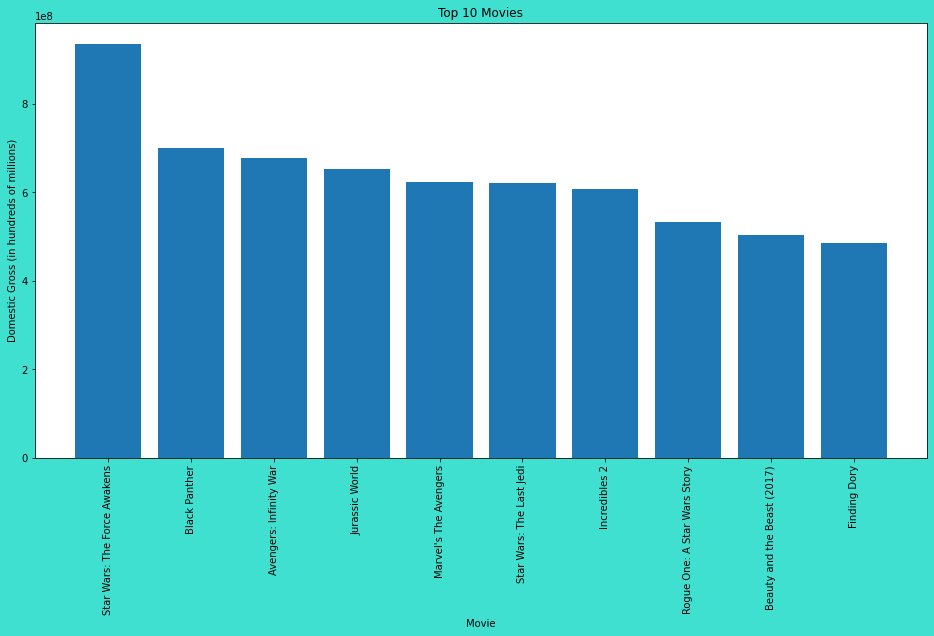

In [98]:
fig, ax = plt.subplots(figsize=(16,8), facecolor="turquoise")

ax.bar(x=top10_df['title'], height=top10_df['domestic_gross'])

ax.tick_params(axis="x", labelrotation=90)
ax.set_title('Top 10 Movies')
ax.set_ylabel('Domestic Gross (in hundreds of millions)')
ax.set_xlabel('Movie');

# Conclusion for Visualization #1
*Box Office Mojo is an database that collects information on domestic & international movies & tv shows. 

The data collected from this source shows 3887 movies had details on studio type, domestic gross, international gross, and year.*

*From analyzing this data, I found ~40% of the foreign gross was missing so I decided to not include this variable and the 'studio' column was dropped.* 

*Ultimately I created a report of the top 10 movies from the years of 2012 to 2018. The #1 highest grossing movie was a sci-fy movie, Star Wars: The Force Awakens. Aside from the #1 movie, the other 9 movies were fiction movies including 1 modern remade sci-fy , 3 cartoon animations, 3 super hero movies (from Marvel Comics), and 2 other movies in the Star Wars series.*

**My recommedation would be to focus on fiction movies such as: a sequel to a successful movie series, a modern remade sci-fy movie, a super hero movies especially from Marvel, and a cartoon animation especially from Disney.**   

# Data Analysis For Visulalization #2
**Visualization #2** = *Movie budget & gross*

In [13]:
file_name_dos = 'tn.movie_budgets.csv.gz'
df_budgetandg = pd.read_csv(f'zippedData/{file_name_dos}')

In [14]:
df_budgetandg.shape

(5782, 6)

In [15]:
df_budgetandg.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [16]:
df_budgetandg.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [17]:
df_budgetandg['worldwide_2gross'] = df_budgetandg['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(np.int64)

df_budgetandg['production_2budget'] = df_budgetandg['production_budget'].str.replace(',', '').str.replace('$', '').astype(np.int64)

df_budgetandg['domestic_2gross'] = df_budgetandg['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(np.int64)
# df_budgetandg

In [18]:
df_budgetandg.dtypes

id                     int64
release_date          object
movie                 object
production_budget     object
domestic_gross        object
worldwide_gross       object
worldwide_2gross       int64
production_2budget     int64
domestic_2gross        int64
dtype: object

In [19]:
df_budgetandg.sort_values(['production_2budget', 'worldwide_2gross'], ascending=False).iloc[:20]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_2gross,production_2budget,domestic_2gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2776345279,425000000,760507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1045663875,410600000,241063875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",149762350,350000000,42762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1403013963,330600000,459005868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1316721747,317000000,620181382
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2053311220,306000000,936662225
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2048134200,300000000,678815482
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",963420425,300000000,309420425
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",879620923,300000000,200074175
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",655945209,300000000,229024295


In [83]:
df_budgetandg['production_2budget'].describe()

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_2budget, dtype: float64

In [84]:
df_budgetandg['worldwide_2gross'].describe()

count    5.782000e+03
mean     9.148746e+07
std      1.747200e+08
min      0.000000e+00
25%      4.125415e+06
50%      2.798445e+07
75%      9.764584e+07
max      2.776345e+09
Name: worldwide_2gross, dtype: float64

# Visualization #2: Movie Budget Vs. Gross

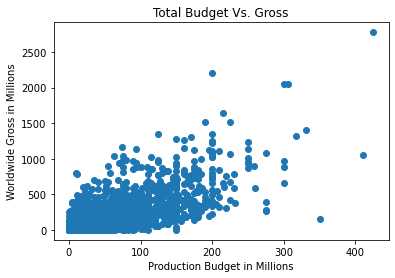

In [100]:
fig, ax = plt.subplots()
ax.scatter(x=df_budgetandg['production_2budget']/1000000 , y=df_budgetandg['worldwide_2gross']/1000000)
ax.set_title('Total Budget Vs. Gross')
ax.set_xlabel('Production Budget in Millions')
ax.set_ylabel('Worldwide Gross in Millions')
ax.ticklabel_format(style='plain')

In [23]:
df_budgetandg.corr(method='pearson')

,id,worldwide_2gross,production_2budget,domestic_2gross
id,1.000000,-0.009422,-0.035278,0.008255
worldwide_2gross,-0.009422,1.000000,0.748306,0.938853
production_2budget,-0.035278,0.748306,1.000000,0.685682
domestic_2gross,0.008255,0.938853,0.685682,1.000000


# Conclusion for Visualization #2

*The Numbers is "premier provider of movie industry data and research services." 

This gave access to data on 5782 movies specifically on release date, movie name, domestic gross, worldwide gross, and production budget.

*After analyzing this data, I found the highest production budget received a worldwide gross of 2,776,345,279 dollars and a production budget of 425,000,000 dollars. 

*This scatter plot clearly shows a positive correlation of ~.74 to production budget and worldwide gross, which means this shows that production budget does impact the worldwide gross.

**Based on this correlation, I'd recommend to focus on production budget to maximize worldwide gross.**  

        **Production Budget:
* 50% percentile 17,000,000 dollars
* 75% percentile 40,000,000 dollars
        
        **Worldwide Gross:
* 50% percentile 27,984,450 dollars
* 75% percentile 97,645,840 dollars

# Data Analysis For Visulalization #3
**Visualization #3** = *Movie rating & release month*

In [24]:
file_name_tres = 'tmdb.movies.csv.gz'
df_ratingandrelease = pd.read_csv(f'zippedData/{file_name_tres}', index_col=0)
df_ratingandrelease.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [25]:
df_ratingandrelease[df_ratingandrelease['vote_average']>= 7]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
...,...,...,...,...,...,...,...,...,...
26374,[99],490002,en,Quiet Heroes,0.600,2018-01-21,Quiet Heroes,7.0,1
26375,"[99, 10402]",485918,en,The Godfathers of Hardcore,0.600,2018-12-12,The Godfathers of Hardcore,7.0,1
26376,"[18, 10749]",474560,en,Sebastian,0.600,2018-02-06,Sebastian,7.0,2
26377,[18],473470,ar,شهيد,0.600,2018-12-01,Martyr,7.0,3


In [26]:
df_ratingandrelease['release_date'].min()

'1930-04-29'

In [27]:
df_ratingandrelease['release_date'].max()

'2020-12-25'

In [ ]:
df_ratingandrelease['release_date']

In [33]:
df_ratingandrelease['release_datexm'] = df_ratingandrelease['release_date'].map(lambda x : int(x[-5:-3]))

In [51]:
df_ratingandmonth = df_ratingandrelease[df_ratingandrelease['vote_average']>= 7].sort_values(['vote_average'], ascending=False)
df_ratingandmonth

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_datexm
23106,"[18, 53]",486863,en,Magnum Opus,0.600,2017-11-09,Magnum Opus,10.0,1,11
19863,[18],426645,es,El pastor,0.600,2016-11-04,The Shepherd,10.0,2,11
19852,[10402],432403,en,Unenlightenment Supercut,0.600,2016-01-15,Unenlightenment Supercut,10.0,1,1
19853,[10402],432397,en,"January 13, 2016",0.600,2016-01-13,"January 13, 2016",10.0,1,1
19854,[10402],432391,en,Never Ever Say Never Ever,0.600,2016-01-08,Never Ever Say Never Ever,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...
16350,[99],588693,ja,Making F.R.I.E.N.D.s: Behind-the scenes of 'Je...,0.633,2015-12-08,Making F.R.I.E.N.D.s: Behind-the scenes of 'Je...,7.0,1,12
16351,[35],400083,en,The Comments,0.633,2015-12-21,The Comments,7.0,1,12
16407,"[12, 35]",450360,en,Imaginapped,0.631,2015-05-02,Imaginapped,7.0,1,5
16408,"[35, 27]",441756,en,Blood That Doesn't Die,0.631,2015-06-23,Blood That Doesn't Die,7.0,1,6


In [53]:
df_ratingandmonth['release_datexm'].value_counts()

1     969
10    867
4     790
11    752
3     681
6     665
9     636
12    616
5     554
8     454
2     442
7     417
Name: release_datexm, dtype: int64

In [29]:
df_ratingandrelease[df_ratingandrelease['vote_average']>= 7].describe()

,id,popularity,vote_average,vote_count
count,7843.000000,7843.000000,7843.000000,7843.000000
mean,334167.259850,2.802733,8.025896,296.017723
std,151741.838103,5.114936,1.032565,1434.170615
min,62.000000,0.600000,7.000000,1.000000
25%,224959.000000,0.600000,7.200000,1.000000
50%,360501.000000,0.840000,7.700000,2.000000
75%,453974.500000,2.103000,8.500000,14.000000
max,607777.000000,80.773000,10.000000,22186.000000


In [30]:
df_ratingandrelease.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

# Visualization #3: Movie Rating & Release Month

Text(0.5, 1.0, 'Numbers of Movies Released w/ 7+ Rating')

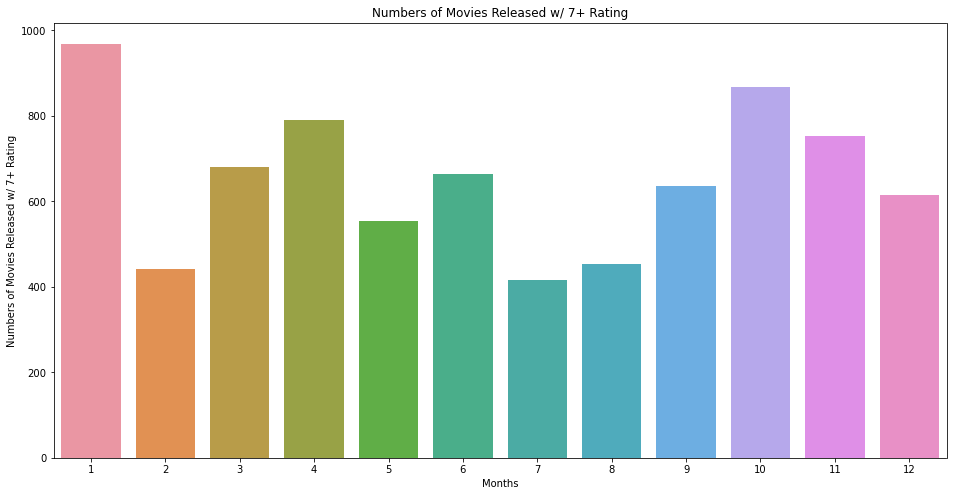

In [82]:
fig, ax1 = plt.subplots(figsize=(16, 8))
sns.barplot(data = df_ratingandmonth.groupby('release_datexm').count().reset_index(), x = 'release_datexm' , y = 'vote_average', ax = ax1)
ax1.set_xlabel('Months')
ax1.set_ylabel('Numbers of Movies Released w/ 7+ Rating')
ax1.set_title('Numbers of Movies Released w/ 7+ Rating')


Text(0.5, 1.0, 'Average Rating Per Month')

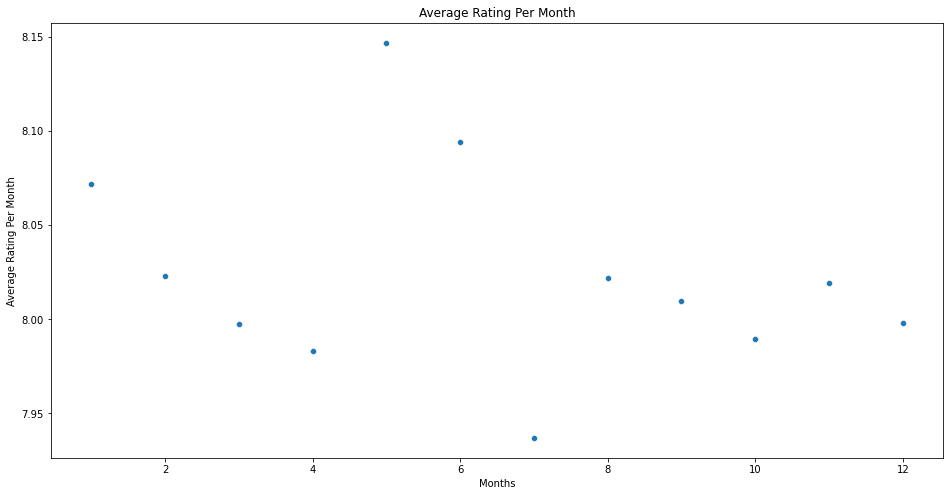

In [81]:
fig, ax1 = plt.subplots(figsize=(16, 8))
sns.scatterplot(data = df_ratingandmonth.groupby('release_datexm').mean().reset_index(), x = 'release_datexm' , y = 'vote_average')
ax1.set_xlabel('Months')
ax1.set_ylabel('Average Rating Per Month')
ax1.set_title('Average Rating Per Month')

# Conclusion for Visualization #3

*The Movie Database (TMDb): TMDb database is created for movies and TV shows.*

*From analyzing this data, their data reflected 26,517 movies with an average rating of 5.9 out of 10. Primarily I focused on 7843 movies that have over a 7.0+ rating with a range of movies from as early as 1930 to 2020.

*Along with the data of the movies with 7+ rating, I created 2 graphs to display how many movies were released each month & the average rating per month.*

**Numbers of Movies Released w/ 7+ Rating**
* The top 3 most popular months that movies were released include: January, October, and April.
* The 3 least popular months that movies were released include: June, July, and Feburary. 

**Average Rating Per Month**
* The top 3 months with the highest rating was May, June, and January.
* The 3 months with the lowest rating were in: November, April, March.

**My recommendation would be to focus on releasing high quality films on the months of January, May, and June, which are in the winter and spring/summer season.**   